In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("raw_data.csv", parse_dates=["InstrumentDateTime"])

In [3]:
df.head()

,LogID,AssayName,SampleNumber,PlateName,AssayType,Result1,Result2,Result5,Pattern1,Pattern2,RawDataValue0,CreatedDate,WellID,Tags,InstrumentDateTime
0,1,ABOD12NC,V000120086624,UA16338742,Blood Grouping,B,+,UA163,-+++--+-,-111--4-,4.3,2020-08-08 15:36:49,A01,None,2020-08-08 15:36:23
1,2,ABOD12NC,V000120086623,UA16338742,Blood Grouping,B,+,UA163,-+++--+-,-111--4-,6.6,2020-08-08 15:36:49,A02,None,2020-08-08 15:36:23
2,3,ABOD12NC,V000120086622,UA16338742,Blood Grouping,B,+,UA163,-+++--+-,-111--4-,8.1,2020-08-08 15:36:49,A03,None,2020-08-08 15:36:23
3,4,ABOD12NC,V000120086621,UA16338742,Blood Grouping,AB,+,UA163,++++----,1111----,87.9,2020-08-08 15:36:49,A04,None,2020-08-08 15:36:23
4,5,ABOD12NC,V000120086620,UA16338742,Blood Grouping,O,Rh -,UA163,------++,------44,9.5,2020-08-08 15:36:49,A05,None,2020-08-08 15:36:23


# Overview

In [4]:
# Check assays which is available on machine
df["AssayName"].unique()

array(['ABOD12NC', 'Pool_Cell'], dtype=object)

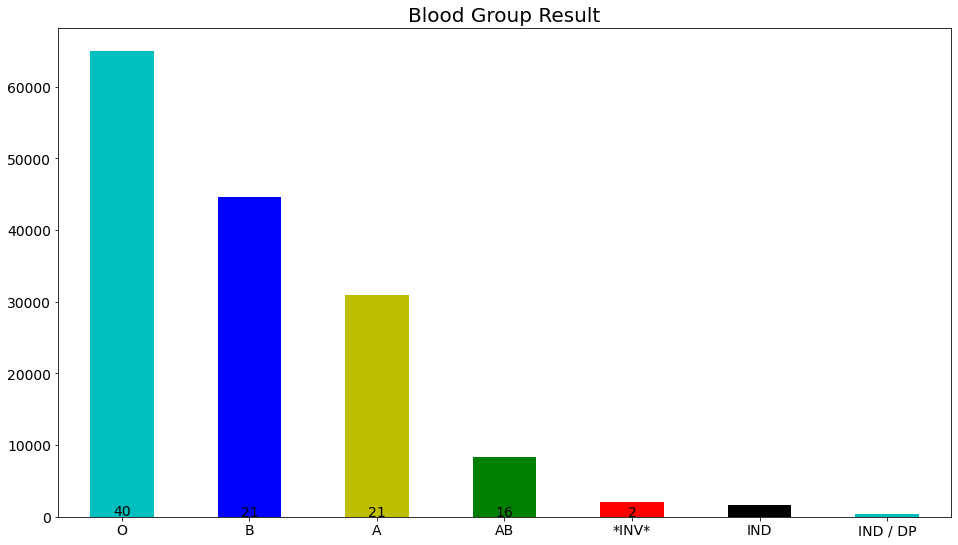

In [5]:
abod = df[df['AssayName']=='ABOD12NC']
abod['Result1'].value_counts().plot.bar(color=['c', 'b', 'y', 'g', 'r', 'k'], figsize=(16,9), fontsize=14, rot=0)
plt.title("Blood Group Result", fontsize=20)

for index, data in enumerate(abod.loc['2021':'2022']['Result1'].value_counts()):
    plt.text(x=index, y=data + 100, s=f"{data}" , fontdict=dict(fontsize=14), ha='center')


# ABOD

In [6]:
abod["Result1"].unique()

array(['B', 'AB', 'O', 'A', '*INV*', 'IND', 'IND / DP'], dtype=object)

In [7]:
abod["Result2"].unique()

array([' +', 'Rh -', '*INV*', 'IND', 'IND / DP'], dtype=object)

In [8]:
# Remove Results that is in '*INV*', 'IND', 'IND / DP'
abo_rhd_demand = abod.loc[(~df["Result1"].isin(["*INV*", "IND", "IND / DP"])) & (~df["Result2"].isin(["*INV*", "IND", "IND / DP"])),
                   ["Result1", "Result2", "InstrumentDateTime"]]
abo_rhd_demand.set_index("InstrumentDateTime", inplace=True)

In [9]:
abo_rhd_demand["Bloodgroup"] = abo_rhd_demand["Result1"] + abo_rhd_demand["Result2"]
abo_rhd_demand["Bloodgroup"] = abo_rhd_demand["Bloodgroup"].apply(lambda x: x.replace('Rh', '') if '-' in x else x)
abo_rhd_demand["Bloodgroup"] = abo_rhd_demand["Bloodgroup"].apply(lambda x: "".join(x.split()))

In [10]:
def create_dataframe_abod(year):
    df = abo_rhd_demand.loc[year, "Bloodgroup"]
    df_values = df.groupby(by=[df.index.month]).value_counts()
    
    df_data = []
    df_dict = {}
    for month in df.index.month.unique():
        for index in df_values.xs(month, level="InstrumentDateTime").index:
            df_dict[index] = df_values.xs(month, level="InstrumentDateTime")[index]
        df_data.append(df_dict)
        df_dict = {}
        
    data = pd.DataFrame(df_data, index=df.index.month.unique())
    
    return data

In [11]:
abo_rhd_demand_2021 = create_dataframe_abod('2021')
abo_rhd_demand_2022 = create_dataframe_abod('2022')

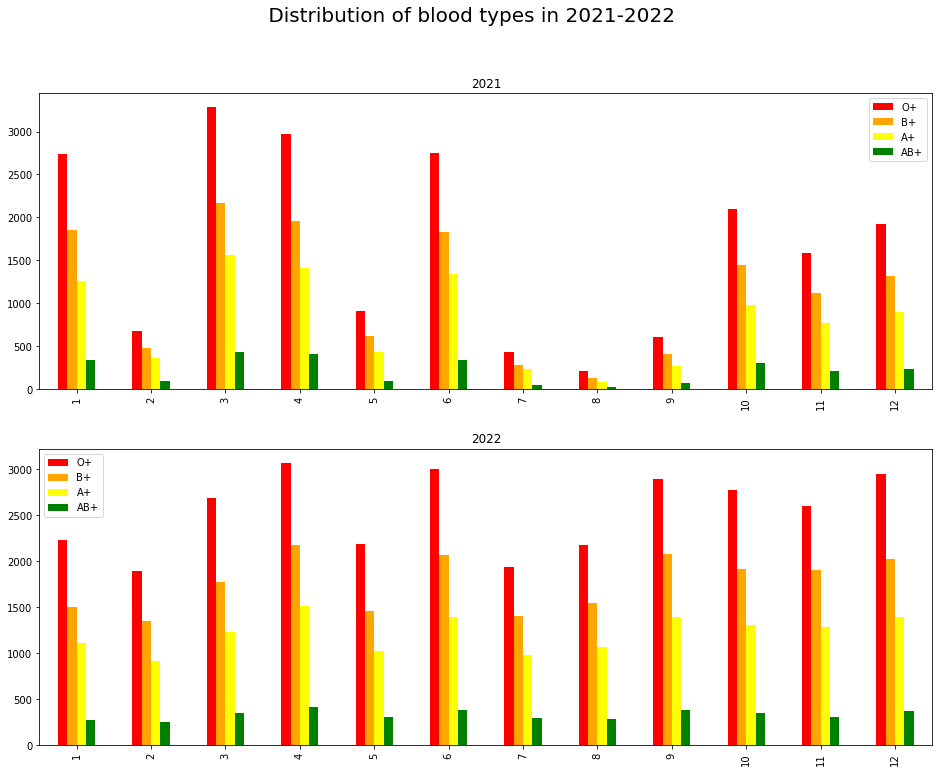

In [12]:
color = ['red', 'orange', 'yellow', 'green']
# Initialise the subplot function using number of rows and columns
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle(' Distribution of blood types in 2021-2022 ', fontsize=20)

# abo_rhd_demand_2020.loc[:, "O+":"AB+"].plot.bar(ax=ax[0])
# ax[0].set_title("2020")

abo_rhd_demand_2021.loc[:, "O+":"AB+"].plot.bar(ax=ax[0], color=color)
ax[0].set_title("2021")
ax[0].set_xlabel("")

abo_rhd_demand_2022.loc[:, "O+":"AB+"].plot.bar(ax=ax[1], color=color)
ax[1].set_title("2022")
ax[1].set_xlabel("")

plt.show()

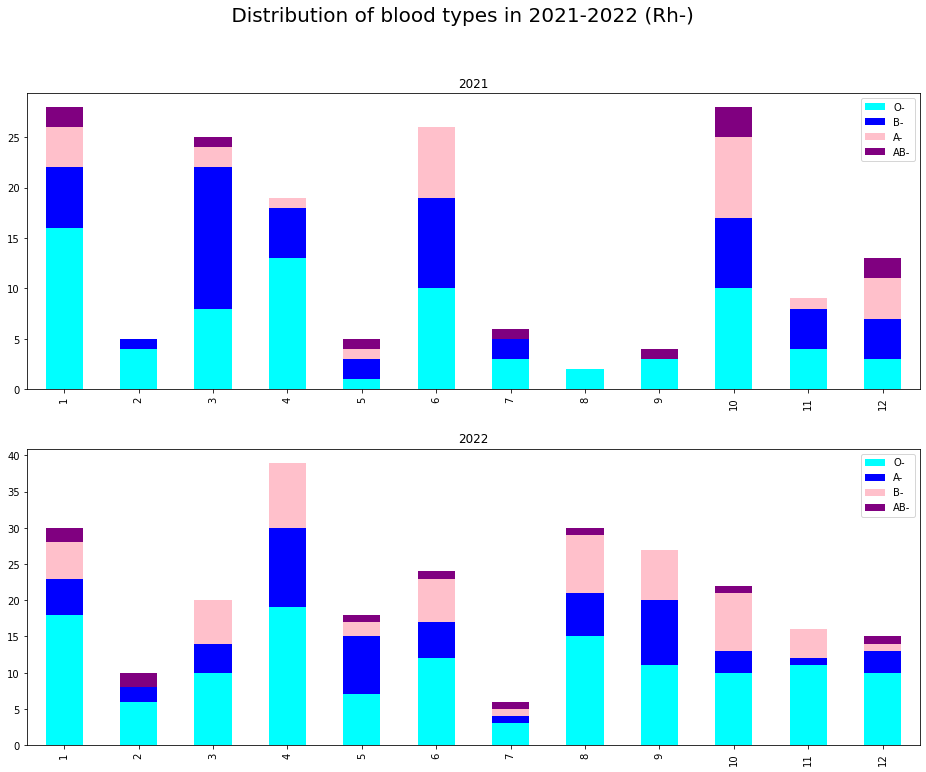

In [13]:
color = ['cyan', 'blue', 'pink', 'purple']
# Initialise the subplot function using number of rows and columns
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle(' Distribution of blood types in 2021-2022 (Rh-)', fontsize=20)

# abo_rhd_demand_2020.loc[:, "O+":"AB+"].plot.bar(ax=ax[0])
# ax[0].set_title("2020")

abo_rhd_demand_2021.loc[:, "O-":"AB-"].plot.bar(ax=ax[0], stacked=True, color=color)
ax[0].set_title("2021")
ax[0].set_xlabel("")

abo_rhd_demand_2022.loc[:, "O-":"AB-"].plot.bar(ax=ax[1], stacked=True, color=color)
ax[1].set_title("2022")
ax[1].set_xlabel("")

plt.show()

# Poolcell

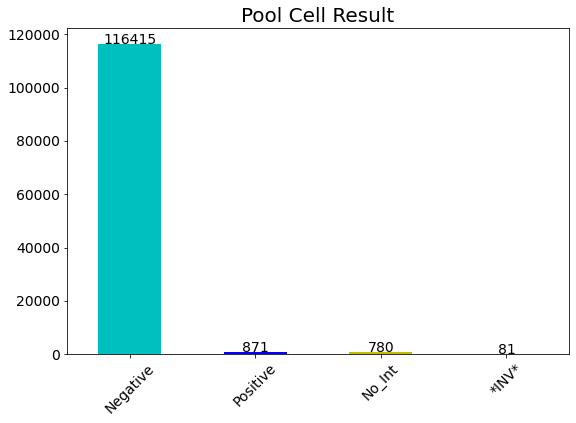

In [14]:
pool_cell = df[df['AssayName']=='Pool_Cell']
pool_cell['Result1'].value_counts().plot.bar(color=['c', 'b', 'y', 'g'], figsize=(9,6), fontsize=14, rot=45)

plt.title("Pool Cell Result", fontsize=20)

for index, data in enumerate(pool_cell['Result1'].value_counts()):
    plt.text(x=index, y=data + 10, s=f"{data}" , fontdict=dict(fontsize=14), ha='center')

In [15]:
pool_cell["Result1"].unique()

array(['Negative', 'Positive', '*INV*', 'No_Int'], dtype=object)

In [16]:
# Remove Results that is in '*INV*', 'IND', 'IND / DP'
pool_cell_demand = pool_cell.loc[(df["Result1"].isin(['Negative', 'Positive']))]
pool_cell_demand.set_index("InstrumentDateTime", inplace=True)

In [17]:
pool_cell_demand.head()

,LogID,AssayName,SampleNumber,PlateName,AssayType,Result1,Result2,Result5,Pattern1,Pattern2,RawDataValue0,CreatedDate,WellID,Tags
InstrumentDateTime,,,,,,,,,,,,,,
2020-08-10 15:40:09,88,Pool_Cell,V000120089530,B05300593,Blood Grouping,Negative,NaN,B053,-,-,3.5,2020-08-10 15:40:29,E01,None
2020-08-10 15:40:09,89,Pool_Cell,V000120089531,B05300593,Blood Grouping,Negative,NaN,B053,-,-,2.7,2020-08-10 15:40:29,F01,None
2020-08-10 15:40:09,90,Pool_Cell,V000120089532,B05300593,Blood Grouping,Negative,NaN,B053,-,-,3.5,2020-08-10 15:40:29,G01,None
2020-08-10 15:40:09,91,Pool_Cell,V000120089533,B05300593,Blood Grouping,Negative,NaN,B053,-,-,2.2,2020-08-10 15:40:29,H01,None
2020-08-10 15:40:09,92,Pool_Cell,V000120089534,B05300593,Blood Grouping,Negative,NaN,B053,-,-,2.7,2020-08-10 15:40:29,A02,None


In [18]:
def create_dataframe_poolcell(year):
    df = pool_cell_demand.loc[year, "Result1"]
    df_values = df.groupby(by=[df.index.month]).value_counts()
    
    df_data = []
    df_dict = {}
    for month in df.index.month.unique():
        for index in df_values.xs(month, level="InstrumentDateTime").index:
            df_dict[index] = df_values.xs(month, level="InstrumentDateTime")[index]
        df_data.append(df_dict)
        df_dict = {}
        
    data = pd.DataFrame(df_data, index=df.index.month.unique())
    
    return data

In [19]:
pool_cell_demand_2021 = create_dataframe_poolcell('2021')
pool_cell_demand_2022 = create_dataframe_poolcell('2022')

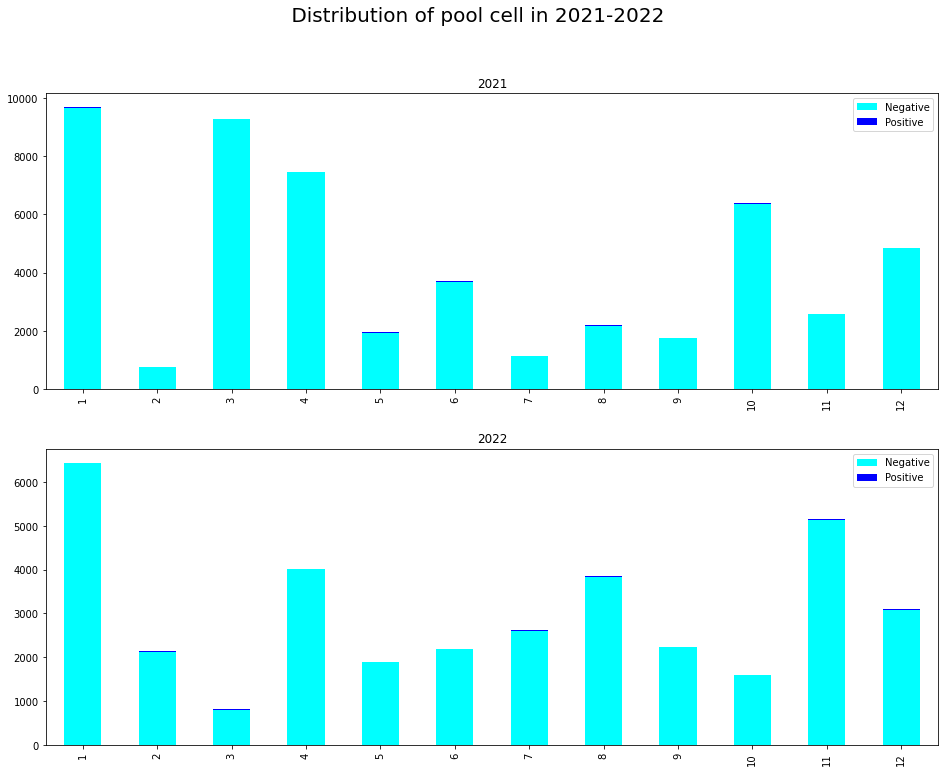

In [20]:
#color = ['cyan', 'blue', 'pink', 'purple']
# Initialise the subplot function using number of rows and columns
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle(' Distribution of pool cell in 2021-2022 ', fontsize=20)

# abo_rhd_demand_2020.loc[:, "O+":"AB+"].plot.bar(ax=ax[0])
# ax[0].set_title("2020")

pool_cell_demand_2021.plot.bar(ax=ax[0], stacked=True, color=color)
ax[0].set_title("2021")
ax[0].set_xlabel("")

pool_cell_demand_2022.plot.bar(ax=ax[1], stacked=True, color=color)
ax[1].set_title("2022")
ax[1].set_xlabel("")

plt.show()